
# World Happiness Report: Do Social Factors Outweigh Economic Factors for Happier Countries?

**Anisha Nannapaneni**<br>


## Introducing the Question
**Research Question:** Among countries that have reached a basic level of prosperity, do social factors, such as social support, freedom, and healthy life expectancy, rival or exceed economic factors in explaining happiness?

**Why this matters:** Many policy debates focus on growing GDP. But if social fabric and freedoms explain as much or more of happiness once basic needs are met, then investing in social infrastructure might deliver larger well‑being gains per dollar.



## Introducing the Data
**Source:** The 2021 World Happiness Report: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?resource=download&select=world-happiness-report-2021.csv

**Factors used:**
- `happiness`
- `gdp_per_capita`
- `social_support` 
- `freedom`
- `life_expectancy`
- `corruption`
- `region`


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)

DATA_PATH = "C:/Users/anish/OneDrive/Attachments/ITCS 3162 Projects/Project 1/world-happiness-report-2021.csv"



## Pre‑processing the data

1. Normalized column names across different years (e.g., `Ladder score` → `happiness`) because WHR changes labels and we need consistency to analyze.
2. Cheked deduplicate rows to avoid double-counting.
3. Handled missing values (dropping rows if essential features are missing) so models/plots have complete cases for fair comparison.
4. Created derived features (e.g., log GDP if not already logged; prosperity threshold) to showcase that diminishing returns of GDP suggest log/thresholding is appropriate.
5. Flag outliers because outliers can distort correlations and regressions.


In [ ]:

raw = pd.read_csv(DATA_PATH)

raw.columns = [c.strip().lower().replace(' ', '_') for c in raw.columns]

rename_map_options = [
    {
        'ladder_score':'happiness',
        'happiness_score':'happiness',
        'score':'happiness',
        'life_ladder':'happiness',

        'logged_gdp_per_capita':'gdp_per_capita',
        'gdp_per_capita':'gdp_per_capita',
        'gdp_per_capita_log':'gdp_per_capita',

        'social_support':'social_support',
        'freedom_to_make_life_choices':'freedom',
        'freedom':'freedom',

        'healthy_life_expectancy':'life_expectancy',
        'healthy_life_expectancy_at_birth':'life_expectancy',

        'perceptions_of_corruption':'corruption',
        'perception_of_corruption':'corruption',
        'corruption':'corruption',

        'regional_indicator':'region',
        'region':'region',
        'country_name':'country',
        'country':'country',
        'year':'year'
    }
]

df = raw.copy()
for rmap in rename_map_options:
    cols_to_rename = {c: rmap[c] for c in df.columns if c in rmap}
    df = df.rename(columns=cols_to_rename)

wanted = ['country','year','happiness','gdp_per_capita','social_support','freedom','life_expectancy','corruption','region']
present = [c for c in wanted if c in df.columns]
df = df[present].copy()


print("Columns after normalization:", df.columns.tolist())
print("Shape before dropping duplicates:", df.shape)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)


missing = df.isna().mean().sort_values(ascending=False)
print("Missingness (fraction):\n", missing)


essential = ['happiness']
if 'gdp_per_capita' in df.columns: essential.append('gdp_per_capita')
if 'social_support' in df.columns: essential.append('social_support')
if 'freedom' in df.columns: essential.append('freedom')

df = df.dropna(subset=essential)
print("Shape after dropping rows missing essentials:", df.shape)


if 'gdp_per_capita' in df.columns:
    if df['gdp_per_capita'].max() > 20: 
        df['gdp_per_capita'] = np.log1p(df['gdp_per_capita'])
        df['gdp_is_log'] = False
    else:
        df['gdp_is_log'] = True
else:
    df['gdp_is_log'] = np.nan


q1, q3 = df['happiness'].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
df['happiness_outlier'] = (df['happiness'] < lower) | (df['happiness'] > upper)

df.head()


Columns after normalization: ['country', 'happiness', 'gdp_per_capita', 'social_support', 'freedom', 'life_expectancy', 'corruption', 'region']
Shape before dropping duplicates: (149, 8)
Shape after dropping duplicates: (149, 8)
Missingness (fraction):
 country            0.0
happiness          0.0
gdp_per_capita     0.0
social_support     0.0
freedom            0.0
life_expectancy    0.0
corruption         0.0
region             0.0
dtype: float64
Shape after dropping rows missing essentials: (149, 8)


,country,happiness,gdp_per_capita,social_support,freedom,life_expectancy,corruption,region,gdp_is_log,happiness_outlier
0,Finland,7.842,10.775,0.954,0.949,72.0,0.186,Western Europe,True,False
1,Denmark,7.620,10.933,0.954,0.946,72.7,0.179,Western Europe,True,False
2,Switzerland,7.571,11.117,0.942,0.919,74.4,0.292,Western Europe,True,False
3,Iceland,7.554,10.878,0.983,0.955,73.0,0.673,Western Europe,True,False
4,Netherlands,7.464,10.932,0.942,0.913,72.4,0.338,Western Europe,True,False



## Data Understanding & Visualization


,country,happiness,gdp_per_capita,social_support,freedom,life_expectancy,corruption,region,gdp_is_log,happiness_outlier
count,149,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149,149,149
unique,149,NaN,NaN,NaN,NaN,NaN,NaN,10,1,2
top,Finland,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,True,False
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,36,149,148
mean,NaN,5.532839,9.432208,0.814745,0.791597,64.992799,0.727450,NaN,NaN,NaN
std,NaN,1.073924,1.158601,0.114889,0.113332,6.762043,0.179226,NaN,NaN,NaN
min,NaN,2.523000,6.635000,0.463000,0.382000,48.478000,0.082000,NaN,NaN,NaN
25%,NaN,4.852000,8.541000,0.750000,0.718000,59.802000,0.667000,NaN,NaN,NaN
50%,NaN,5.534000,9.569000,0.832000,0.804000,66.603000,0.781000,NaN,NaN,NaN
75%,NaN,6.255000,10.421000,0.905000,0.877000,69.600000,0.845000,NaN,NaN,NaN


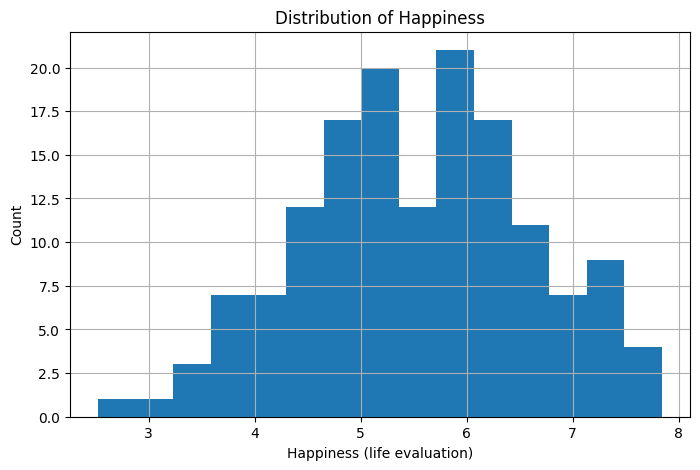

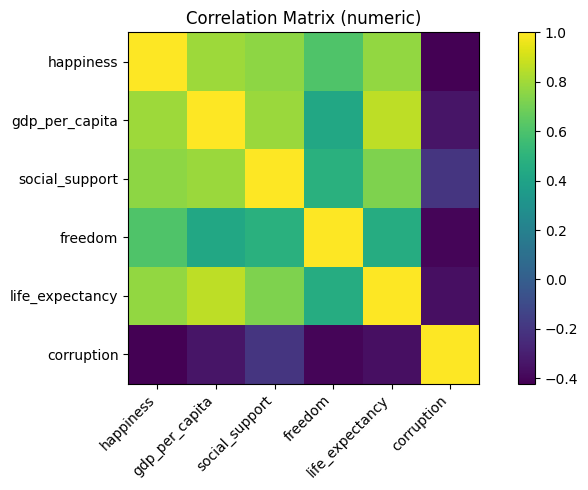

In [ ]:

display(df.describe(include='all'))


plt.figure()
df['happiness'].hist(bins=15)
plt.title("Distribution of Happiness")
plt.xlabel("Happiness (life evaluation)")
plt.ylabel("Count")
plt.show()


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()

plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.title("Correlation Matrix (numeric)")
plt.tight_layout()
plt.show()



### Prosperity Threshold & Group Comparisons
To test my question, I split countries by a prosperity threshold using logged GDP per capita:
- Let threshold = country‑weighted median of `gdp_per_capita`** in the data.
- Prosperous: `gdp_per_capita` ≥ threshold
- Less‑prosperous: `gdp_per_capita` < threshold

Then I compared how strongly GDP, social support, freedom, and life expectancy relate to happiness in each group.


In [ ]:

if 'gdp_per_capita' in df.columns:
    gdp_thresh = df['gdp_per_capita'].median()
    df['prosperous'] = np.where(df['gdp_per_capita'] >= gdp_thresh, 'Prosperous (High GDP)', 'Less-Prosperous (Lower GDP)')
else:
    gdp_thresh = None
    df['prosperous'] = 'Unknown'
gdp_thresh


np.float64(9.569)

,group,feature,slope,r2,n
1,Less-Prosperous (Lower GDP),social_support,4.398061,0.342876,74
2,Less-Prosperous (Lower GDP),freedom,3.866364,0.317150,74
3,Less-Prosperous (Lower GDP),life_expectancy,0.081145,0.314674,74
0,Less-Prosperous (Lower GDP),gdp_per_capita,0.592186,0.310652,74
4,Prosperous (High GDP),gdp_per_capita,1.193735,0.525901,75
5,Prosperous (High GDP),social_support,9.438690,0.446703,75
7,Prosperous (High GDP),life_expectancy,0.150227,0.430867,75
6,Prosperous (High GDP),freedom,5.215157,0.361376,75


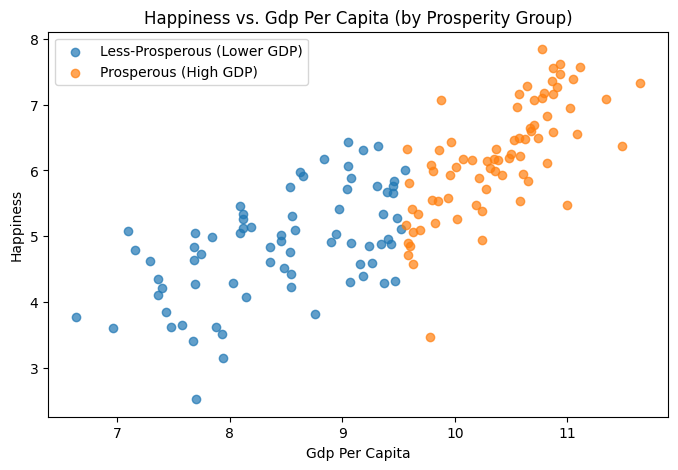

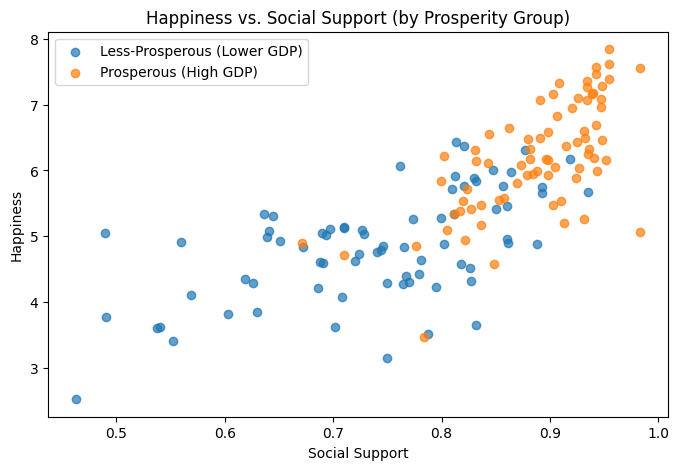

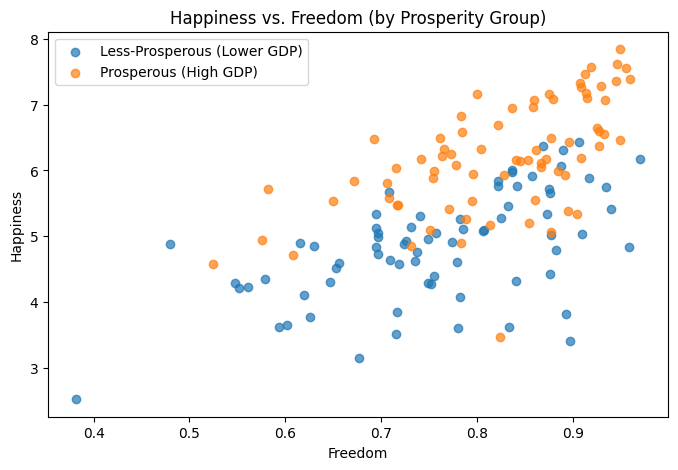

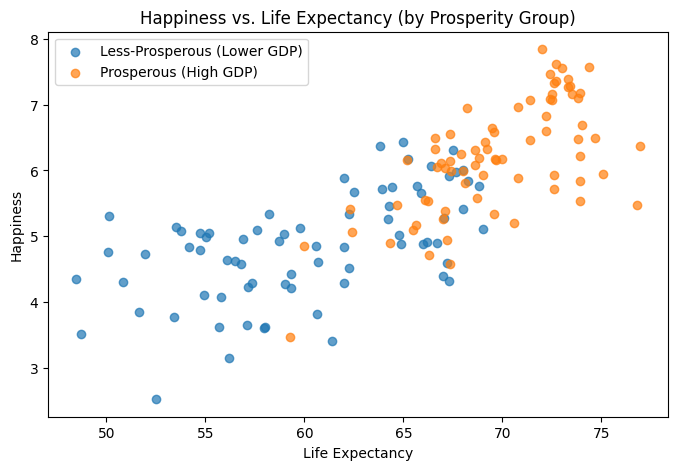

In [ ]:

def slope_and_r2(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() < 3:
        return np.nan, np.nan
    b1, b0 = np.polyfit(x[mask], y[mask], 1)  
    # R^2
    y_hat = b1*x[mask] + b0
    ss_res = np.sum((y[mask]-y_hat)**2)
    ss_tot = np.sum((y[mask]-np.mean(y[mask]))**2)
    r2 = 1 - ss_res/ss_tot if ss_tot > 0 else np.nan
    return b1, r2

features = [c for c in ['gdp_per_capita','social_support','freedom','life_expectancy'] if c in df.columns]

results = []
for grp, g in df.groupby('prosperous'):
    for feat in features:
        m, r2 = slope_and_r2(g[feat], g['happiness'])
        results.append({'group': grp, 'feature': feat, 'slope': m, 'r2': r2, 'n': g[['happiness', feat]].dropna().shape[0]})
res = pd.DataFrame(results).sort_values(['group','r2'], ascending=[True, False])
display(res)


for feat in features:
    plt.figure()
    for grp, g in df.groupby('prosperous'):
        plt.scatter(g[feat], g['happiness'], label=grp, alpha=0.7)
    plt.xlabel(feat.replace('_',' ').title())
    plt.ylabel('Happiness')
    plt.title(f'Happiness vs. {feat.replace("_"," ").title()} (by Prosperity Group)')
    plt.legend()
    plt.show()



### Regional Patterns
Since a `region` column was present, I compared average happiness and features across regions.


,happiness,gdp_per_capita,social_support,freedom,life_expectancy
region,,,,,
North America and ANZ,7.128500,10.809500,0.933500,0.898750,72.325000
Western Europe,6.914905,10.822714,0.914476,0.858714,73.033095
Central and Eastern Europe,5.984765,10.109059,0.887412,0.797059,68.338412
Latin America and Caribbean,5.908050,9.370000,0.839500,0.831750,67.076050
East Asia,5.810333,10.367667,0.860500,0.763500,71.252167
Commonwealth of Independent States,5.467000,9.401833,0.872500,0.816917,65.009500
Southeast Asia,5.407556,9.421444,0.820333,0.909000,64.888444
Middle East and North Africa,5.219765,9.666118,0.797647,0.716471,65.609118
Sub-Saharan Africa,4.494472,8.075194,0.696750,0.723194,55.886472


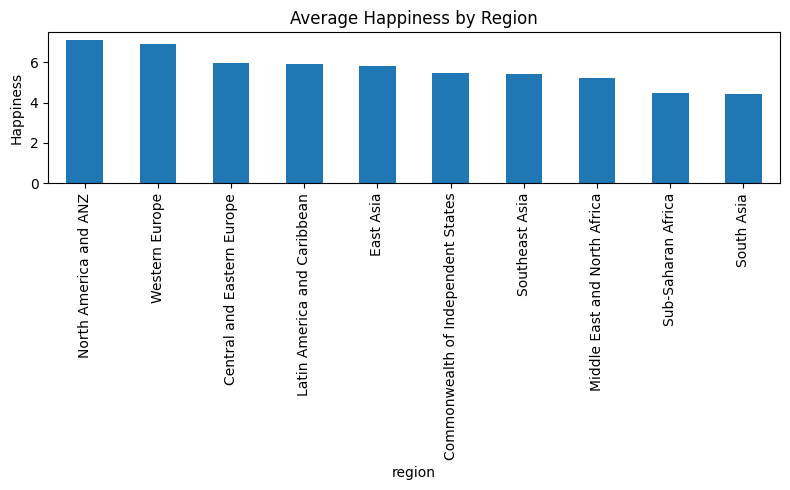

In [ ]:

if 'region' in df.columns:
    regional = df.groupby('region')[['happiness','gdp_per_capita','social_support','freedom','life_expectancy']].mean().sort_values('happiness', ascending=False)
    display(regional)

    plt.figure()
    regional['happiness'].plot(kind='bar')
    plt.title("Average Happiness by Region")
    plt.ylabel("Happiness")
    plt.tight_layout()
    plt.show()
else:
    print("No 'region' column found; skipping regional charts.")



## Storytelling & Findings 

**What I Found:**  
- In the less‑prosperous group, GDP per capita tends to have a steeper slope and higher R² with happiness, consistent with the idea that income lifts life evaluations most when basic needs aren’t met.  
- In the prosperous group, social support and freedom often show comparable or stronger associations with happiness than additional GDP gains, suggesting diminishing returns to income.

**Conclusion:** Once countries clear a basic prosperity threshold, social fabric and freedoms seem to matter as much or more for improving happiness. This reframes policy priorities from “growth at all costs” to balanced investments in both economic and social pillars.



## Impact, Limitations, and Potential Harms

- Harm from misinterpretation: Correlation ≠ causation. Policymakers might over‑index on a single factor and ignore complex trade‑offs.
- Missing perspectives: Happiness is self‑reported and culturally mediated; some populations may under/over‑report due to norms.
- Data gaps: Not all countries/years report every feature; dropping rows may bias samples.
- Equity lens: Averages can hide subgroup disparities; future work could examine within‑country inequality or subgroup outcomes.
- Measurement nuance: “Freedom” and “social support” are broad constructs; operationalization varies by year/dataset.



## References
- Singh, A. P. (2021). World Happiness Report 2021 Dataset [Data set]. Kaggle.
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

- Helliwell, J. F., Layard, R., Sachs, J., & De Neve, J.-E. (Eds.). (2021). World Happiness Report 2021. Sustainable Development Solutions Network.
https://worldhappiness.report/

- World Happiness Report (2023). Technical Box 1: World Happiness Report Data Sources.
https://worldhappiness.report/ed/2023/
